# Práctica 6 - KNN
## Escuela Superior de Computo

> Phd. Consuelo Varinia Garcia Mendoza

> Daniel Armas Ramirez

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

## Iris dataset

> Lectura de la data

In [32]:
df = pd.read_csv('./iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Modelo

In [34]:
kfold = KFold(n_splits=3)
model = KNeighborsClassifier(n_neighbors=1)
results_1NN_iris = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
mean_score_1NN_iris = results_1NN_iris.mean()

results_1NN_iris

array([0.85714286, 1.        , 0.94285714])

In [35]:
mean_score_1NN_iris

0.9333333333333332

In [36]:
kfold = KFold(n_splits=3)
model = KNeighborsClassifier(n_neighbors=10, weights='uniform')
results_10NN_iris = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
mean_score_10NN_iris = results_10NN_iris.mean()

results_10NN_iris

array([0.91428571, 1.        , 0.91428571])

In [37]:
mean_score_10NN_iris

0.9428571428571427

In [38]:
kfold = KFold(n_splits=3)
model = KNeighborsClassifier(n_neighbors=10, weights='distance')
results_10NNd_iris = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
mean_score_10NNd_iris = results_10NNd_iris.mean()

results_10NNd_iris

array([0.91428571, 1.        , 0.91428571])

In [17]:
mean_score_10NNd_iris

0.9428571428571427

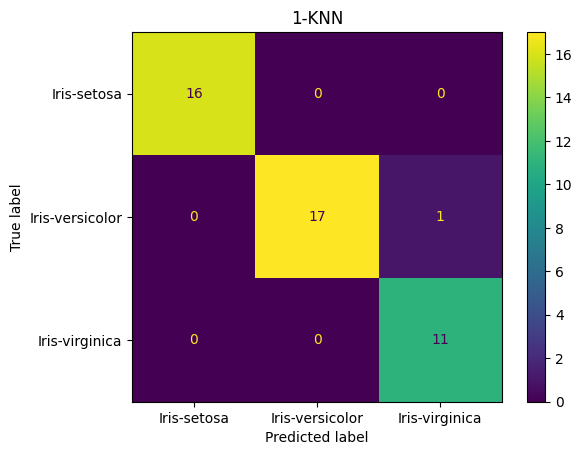

In [39]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('1-KNN')
plt.show()

In [41]:
metrics = classification_report(y_test, predictions)
print(metrics)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



## Emails

> Lectura de data

In [42]:
df2 = pd.read_csv('./emails.csv')
df2.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [43]:
X = df2.iloc[:, 1: -1]
y = df2['Prediction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

> Modelo

In [44]:
kfold = KFold(n_splits=3)
model = KNeighborsClassifier(n_neighbors=1)
results_1NN_emails = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
mean_score_1NN_emails = results_1NN_emails.mean()

results_1NN_emails

array([0.85666943, 0.83761392, 0.84825871])

In [45]:
mean_score_1NN_emails

0.8475140178697784

In [46]:
kfold = KFold(n_splits=3)
model = KNeighborsClassifier(n_neighbors=10, weights='uniform')
results_10NN_emails = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
mean_score_10NN_emails = results_10NN_emails.mean()

results_10NN_emails

array([0.87572494, 0.84755592, 0.86069652])

In [47]:
mean_score_10NN_emails

0.8613257930177888

In [48]:
kfold = KFold(n_splits=3)
model = KNeighborsClassifier(n_neighbors=10, weights='distance')
results_10NNd_emails = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
mean_score_10NNd_emails = results_10NNd_emails.mean()

results_10NNd_emails

array([0.87655344, 0.84921292, 0.86981758])

In [26]:
mean_score_10NNd_emails

0.8651946472186612

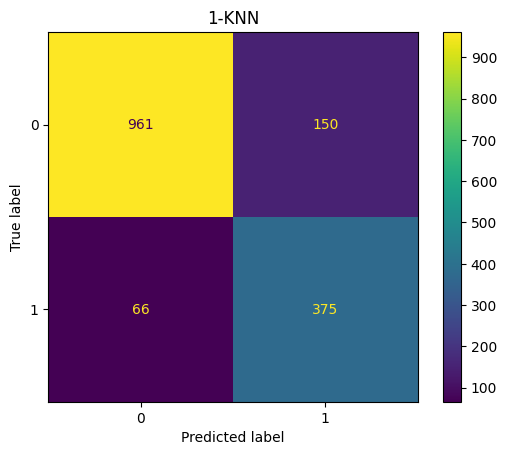

In [49]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('1-KNN')
plt.show()

In [50]:
metrics = classification_report(y_test, predictions)
print(metrics)

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1111
           1       0.71      0.85      0.78       441

    accuracy                           0.86      1552
   macro avg       0.83      0.86      0.84      1552
weighted avg       0.87      0.86      0.86      1552



# Resultados

In [27]:
accuracies = [val for val in results_1NN_iris]
accuracies.append(mean_score_1NN_iris)

for val in results_10NN_iris:
    accuracies.append(val)

accuracies.append(mean_score_10NN_iris)

for val in results_10NNd_iris:
    accuracies.append(val)

accuracies.append(mean_score_10NNd_iris)

for val in results_1NN_emails:
    accuracies.append(val)

accuracies.append(mean_score_1NN_emails)

for val in results_10NN_emails:
    accuracies.append(val)

accuracies.append(mean_score_10NN_emails)

for val in results_10NNd_emails:
    accuracies.append(val)

accuracies.append(mean_score_10NNd_emails)

In [28]:
results_table = [[
            'iris.csv', 'iris.csv', 'iris.csv',
            'iris.csv', 'iris.csv', 'iris.csv',
            'iris.csv', 'iris.csv', 'iris.csv',
            'iris.csv', 'iris.csv', 'iris.csv',
            'emails.csv', 'emails.csv', 'emails.csv',
            'emails.csv', 'emails.csv', 'emails.csv',
            'emails.csv', 'emails.csv', 'emails.csv',
            'emails.csv', 'emails.csv', 'emails.csv',
           ],
            [
                1, 1, 1, 1,
                10, 10, 10, 10,
                10, 10, 10, 10,
                1, 1, 1, 1,
                10, 10, 10, 10,
                10, 10, 10, 10,
            ],
            [
                '-----', '-----', '-----', '-----',
                'uniforme', 'uniforme', 'uniforme', 'uniforme',
                'distancia', 'distancia', 'distancia', 'distancia',
                '-----', '-----', '-----', '-----',
                'uniforme', 'uniforme', 'uniforme', 'uniforme',
                'distancia', 'distancia', 'distancia', 'distancia',
            ],
            [
                '1', '2', '3', 'Promedio',
                '1', '2', '3', 'Promedio',
                '1', '2', '3', 'Promedio',
                '1', '2', '3', 'Promedio',
                '1', '2', '3', 'Promedio',
                '1', '2', '3', 'Promedio',
            ]
]

index = pd.MultiIndex.from_arrays(results_table, names = ('Dataset', 'Vecinos', 'Pesos', 'Pliegue'))
report = pd.DataFrame({'Accuracy': accuracies}, index=index)
report

Accuracy
Dataset    Vecinos Pesos     Pliegue           
iris.csv   1       -----     1         0.857143
                             2         1.000000
                             3         0.942857
                             Promedio  0.933333
           10      uniforme  1         0.914286
                             2         1.000000
                             3         0.914286
                             Promedio  0.942857
                   distancia 1         0.914286
                             2         1.000000
                             3         0.914286
                             Promedio  0.942857
emails.csv 1       -----     1         0.856669
                             2         0.837614
                             3         0.848259
                             Promedio  0.847514
           10      uniforme  1         0.875725
                             2         0.847556
                             3         0.860697
                             Promedio  0.861326
                   distancia 1         0.876553
                             2         0.849213
                             3         0.869818
                             Promedio  0.865195

In [30]:
final_acc = [1.00, 0.942857, 0.95, 0.865195]
final_report = [
    [
        'iris.csv', 'iris.csv', 'emails.csv', 'emails.csv'
    ],
    [
        'Naïve Bayes', 'K-NN', 'Naïve Bayes', 'K-NN'
    ],
    [
        '-----', '10', '-----', '10'
    ],
    [
        '-----', 'Distancia', '------', 'Distancia'
    ],
    [
        'Normal', '--------', 'Normal', '------'
    ],
]

idx = pd.MultiIndex.from_arrays(final_report, names = ('Dataset', 'Clasificador', 'Vecinos', 'Pesos', 'Distribución'))
freport = pd.DataFrame({'Accuracy': final_acc}, index=idx)
freport

Accuracy
Dataset    Clasificador Vecinos Pesos     Distribución          
iris.csv   Naïve Bayes  -----   -----     Normal        1.000000
           K-NN         10      Distancia --------      0.942857
emails.csv Naïve Bayes  -----   ------    Normal        0.950000
           K-NN         10      Distancia ------        0.865195